# Extraction de Keywords

## Imports

In [ ]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

In [ ]:
# Création d'une liste de mots à ignorer
ignored = set(["conseil communal", "conseil général"])
ignored

In [ ]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [ ]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [ ]:
# Imprimer le nombre de fichiers identifiés
len(files)

In [ ]:
# Les dix premiers fichiers
files[:20]

In [ ]:
# Enlever les fichiers qui ne commencent pas par Bxl_
bxl_files = [f for f in files if f.startswith('Bxl_')]
len(bxl_files)

## SELECTION ANNEE 1915

In [ ]:
# Choisir un fichier
this_file = bxl_files[1068]
this_file

In [ ]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

In [ ]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [ ]:
keywords

In [ ]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

# Nuages de mots

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["alors","au","au","aucuns","aussi","autre","avant","avec","avoir","bon","car","ce","cela","ces","ceux",
"chaque","ci","comme","comment","dans","des","du","dedans","dehors","depuis","devrait","doit","donc","dos",
"début","elle","elles","en","encore","essai","est","et", "eu","fait","faites","fois","font","hors","ici","il", "ils",
"je","juste","la","le","les","leur","là","ma","maintenant","mais","mes","mien","moins","mon","mot","même","ni","nommés",
"notre","nous","ou","où","par","parce","pas","peut","peu","plupart","pour","pourquoi","quand","que","quel","quelle","quelles","quels","qui","sa"
"sans","ses","seulement","si","sien","son","sont","sous","soyez"]
sw = set(sw)


In [6]:
# Choisir une année
year = 1915

In [7]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1915_Tome_II1_Part_1.txt',
 'Bxl_1915_Tome_II1_Part_2.txt',
 'Bxl_1915_Tome_II1_Part_3.txt',
 'Bxl_1915_Tome_II1_Part_4.txt',
 'Bxl_1915_Tome_II1_Part_5.txt']

In [8]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [9]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

5

In [10]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

'115592\n118453\n121015\n122174\n124000\n127187\n127309\n127800\n127838\n128041\n128327\n\n103651\n106129\n106336\n106490\n100550\n107280\n109702\n113055\n113448\n113616\n114057\n\n83450\n88295\n92918\n93781\n97044\n98534\n99472\n10'

In [11]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [12]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"115592\n118453\n121015\n122174\n124000\n127187\n127309\n127800\n127838\n128041\n128327\n\n103651\n106129\n106336\n106490\n100550\n107280\n109702\n113055\n113448\n113616\n114057\n\n83450\n88295\n92918\n93781\n97044\n98534\n99472\n100352\n102486\n102705\n102930\n\n-4\n\n111171\n111513\n141574\n141847\n142463\nI 14201\n145032\n148209\nL48393\n149946\n153027\n\n128700\n129293\n131400\n131924\n132304\n133647\n135734\n136949\n137018\n138019\n139298\n\nL56551\n103200\nL64856\n165952\n106029\n166521\n166683\n167750\n167801\n107807\n\nL'intérêt cesse de plein droit dès que l'"

In [13]:
## Nettoyer le fichier à l'aide d'une fonction de nettoyage


In [14]:
### Créer la fonction de nettoyage (à adapter)

In [15]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [16]:
### Appliquer la fonction sur le fichier complet de l'année

In [17]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1915_clean.txt!'

In [18]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'intérêt cesse plein droit dès obligation remboursable bonifié fractions coupons coupons indûment détachés déduits capital obligations sorties tirages francs plus doivent être visées bureau dette communale maison étage être présentées remboursement chez caissier ville montagne parc vérification cxaz janvier parfaite épuration pression moyenne soirée pouvoir calorifique millimètres gaz calories vechec bourgmestre raison situation actuelle article communale arrête festivités habituelles carnaval su'

In [19]:
## Nuage de mots

In [20]:
### Afficher les termes les plus fréquents


In [21]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('dépenses', 302), ('francs', 283), ('frais', 210), ('conseil', 208), ('recettes', 201), ('intérêts', 193), ('collège', 163), ('compte', 161), ('budget', 141), ('exercice', 129)]


In [22]:
### Créer, stocker et afficher le nuage de mots

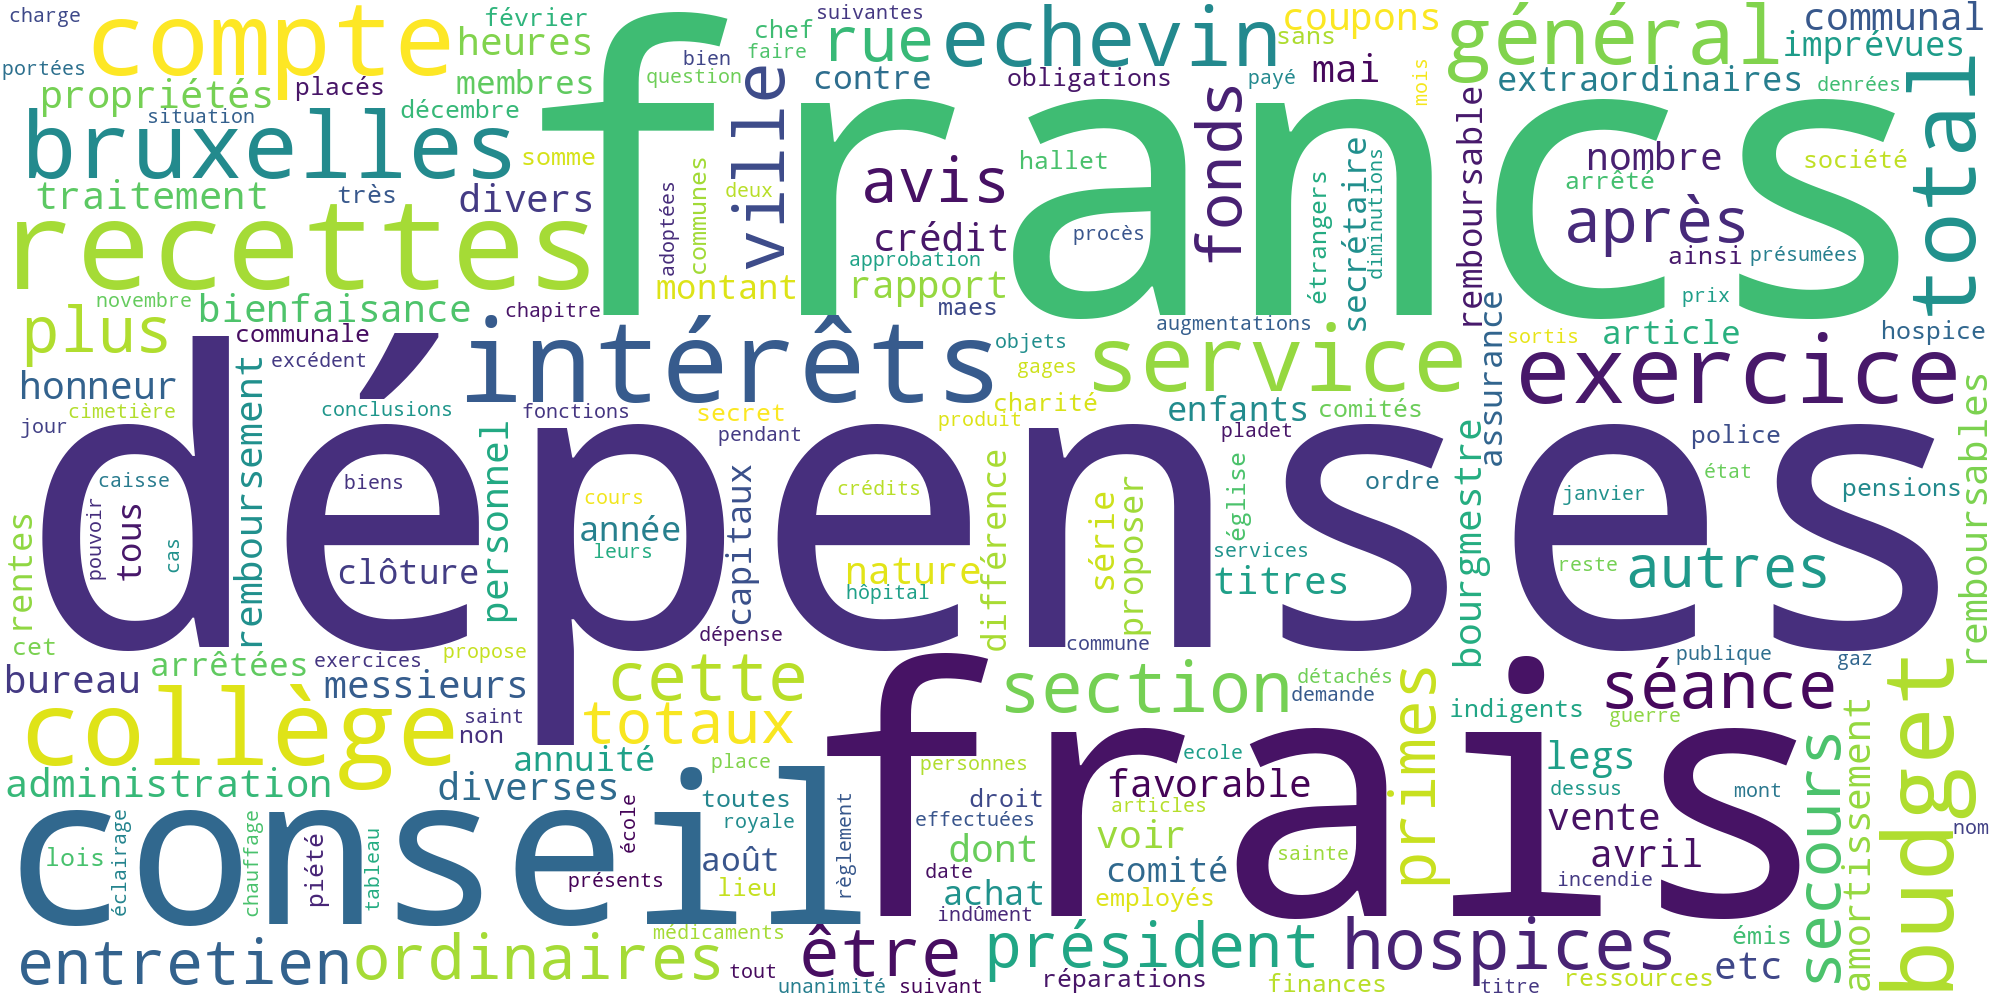

In [23]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Imports

In [ ]:
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

In [ ]:
nlp = spacy.load('fr_core_news_md')

## Exemple sur un corpus de test fourni par SpaCy

In [ ]:
# Imprimer le corpus de Spacy
sentences='../data/tmp/1915.txt'

In [ ]:
# Isoler la première phrase
sent = sentences[10]
sent

In [ ]:
# Traiter la phrase avec Spacy
doc = nlp(sent)

In [ ]:
type(doc)

In [ ]:
doc.text

In [ ]:
doc.to_json()

In [ ]:
# Appliquer le test sur toutes les phrases
for sent in sentences:
    doc = nlp(sent)
    entities = []
    for ent in doc.ents:
        entities.append(f"{ent.text} ({ent.label_})")
    if entities:
        print(f"'{doc.text}' contient les entités suivantes : {', '.join(entities)}")
    else:
        print(f"'{doc.text}' ne contient aucune entité")

## Appliquer la reconnaissance d'entités nommées sur notre corpus

In [ ]:
# Charger le texte
n=900000
text = open("../data/all.txt", encoding='utf-8').read()[:n]

In [ ]:
%%time
# Traiter le texte

doc = nlp(text)

In [ ]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [ ]:
# Trier et imprimer

sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

# SENTIMENT

In [ ]:
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

## Fonction

In [ ]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

## Analyser le sentiment d'une phrase

In [ ]:
get_sentiment("A R T . 3 . — Défense est faite à quiconque de se montrer masqué ou travesti dans les voies publiques.")

In [ ]:
get_sentiment("Les recettes ordinaires ont donc été inférieures aux prévisions defr.")

In [ ]:
get_sentiment("Sauf les numéros indiqués ci-dessus, les séries suivantes sont remboursables par 110 francs")

In [ ]:
get_sentiment("I l ne sera pas bonifié de fractions de coupons. Les coupons indûment détachés seront déduits du capital.")

In [ ]:
get_sentiment("L'intérêt cesse de plein droit dès que l'obligation est remboursable.")

In [ ]:
get_sentiment("les issues non préparées sont assimilées aux viandesfraî ches ; elles ne pourront être préparées qu'à l'abattoir.")

In [ ]:
get_sentiment("Toute viande reconnue malsaine ou de mauvaise qualité sera saisie et enfouie conformément aux lois et règlements en vigueur.")

In [ ]:
get_sentiment("Les contraventions à l a présente ordonnance seront punies d'une amende de 1 à 25 francs et d'un emprisonnement d'un à sept jours. Ces peines seront appliquées séparément ou cumulativement.")

In [ ]:
get_sentiment("Contrairement à certains bruits alarmants, l'autorité médicale affirme qu'il ne s'agit pas de choléra")

In [ ]:
get_sentiment("Éviter de rendre visite à des familles dans lesquelles des cas de diarrhée suspecte auraient été constatés")

In [ ]:
get_sentiment("Les infractions au présent règlement sont punies des peines de police, sans préjudice des autres pénalités prévues, soit par les lois en vigueur, soit par les lois militaires belges.")